In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

In [2]:
plt.rcParams['figure.figsize'  ] = (6.6,5.6)
plt.rcParams['font.size'       ] = 10
plt.rcParams['legend.fontsize' ] = 10
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0.5

In [3]:
z_init = 30
z_end = 5

num = 35

In [4]:
s_list = np.arange(num)

In [5]:
a = lambda z: 1/(1 + z)
z = lambda a: 1/a - 1

### Constant separation in log-a (scalefactor) roughly translates to equally spaced in time, since by definition ${\rm d}log(a) = H(t) \rm{d}t$, if we take $H(t)\equiv H$

In [6]:
a_list = np.logspace(np.log10(a(z_init)), np.log10(a(z_end)), num)
z_list = z(a_list)

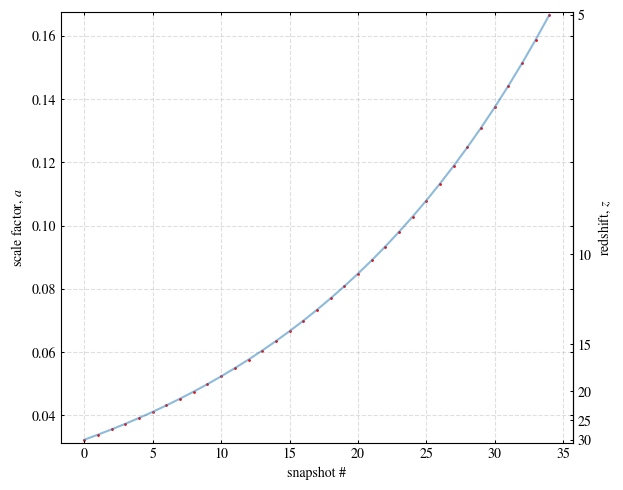

In [7]:
fig, ax = plt.subplots()
ax.plot(s_list, a_list, alpha=0.5)
ax.scatter(s_list, a_list, s=1, c="red")

ax_ = ax.secondary_yaxis("right", functions=(z,a))

ax.set_xlabel("snapshot #")
ax.set_ylabel(r"scale factor, $a$")
ax_.set_ylabel(r"redshift, $z$")
ax.grid(alpha=0.4, ls="dashed")

ax.set_ylim(a_list[0] - 1e-3, a_list[-1] + 1e-3)

plt.savefig("snap_list.pdf")

In [8]:
ages = cosmo.age(z_list).to(u.Myr).value

### Here we take the time difference between consecutive snap dumps. This is what should be compared with the dynamical times.

In [9]:
time_diff = np.diff(ages) 

In [10]:
time_diff.min(), time_diff.max(), np.mean(time_diff), np.median(time_diff)

(np.float64(7.490265691701495),
 np.float64(81.69024937467566),
 np.float64(31.522014199777185),
 np.float64(24.815964224908043))

### As seen above, the time_diff is fairly small. It is not the same, since H varies, but the variation is not huge.

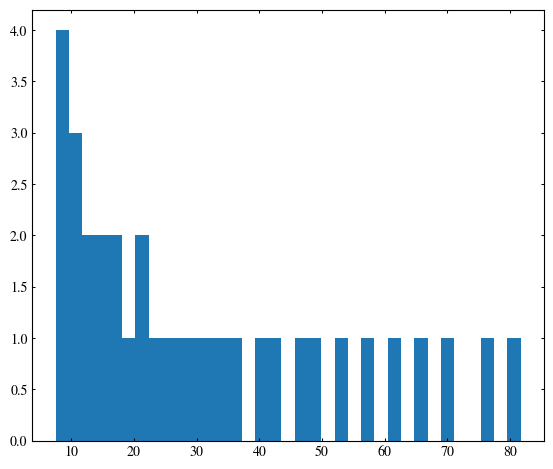

In [11]:
_ = plt.hist(time_diff, bins=num)

In [12]:
t_H = lambda z: (1/cosmo.H(z)).to(u.Myr).value # Hubble time

### Defining typical dynamical time as 0.1 times the Hubble time. I can't find a good reference for this; something that I was told during my PhD.

In [13]:
dyn_time = 0.1 * t_H(z_list)

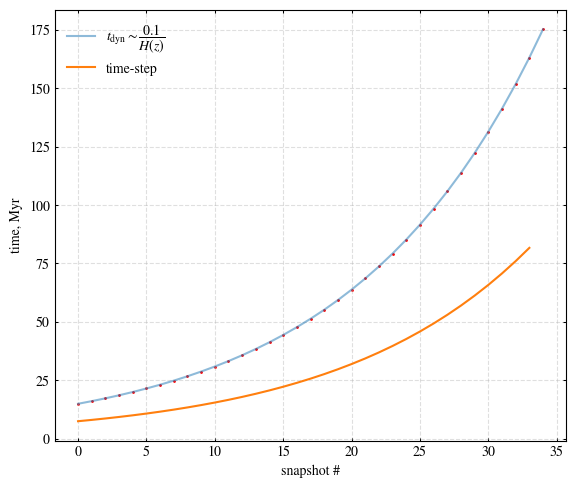

In [14]:
fig, ax = plt.subplots()

ax.plot(s_list, dyn_time, label=r"$t_{\rm dyn} \sim \dfrac{0.1}{H(z)}$", alpha=0.5)
ax.scatter(s_list, dyn_time, s=1, c="red")
ax.plot(time_diff, label="time-step")


ax.set_xlabel("snapshot #")
ax.set_ylabel("time, Myr")
ax.grid(alpha=0.4, ls="dashed")

ax.legend()
plt.savefig("cadence_compare.pdf")

## Note that in the above plot, $t_{\rm dyn}$ is actual time (in Myr) while `time-step` is the diff temporal separation of snapshots. The main takeaway is to ensure that the `time-step` curve is lower than the $t_{\rm dyn}$ one.

In [15]:
np.savetxt("a_list.txt", a_list)

In [16]:
dyn_time[:-1]/time_diff

array([1.99607277, 1.9960832 , 1.9960933 , 1.99610312, 1.99611269,
       1.99612208, 1.99613134, 1.99614052, 1.99614968, 1.9961589 ,
       1.99616824, 1.99617781, 1.99618767, 1.99619796, 1.99620878,
       1.99622026, 1.99623257, 1.99624588, 1.99626038, 1.99627631,
       1.99629393, 1.99631353, 1.99633547, 1.99636013, 1.99638797,
       1.99641952, 1.99645538, 1.99649623, 1.99654287, 1.99659622,
       1.99665731, 1.99672736, 1.99680774, 1.99690003])

In [17]:
dyn_time[:-1]

array([ 14.95111539,  16.07756283,  17.28870157,  18.59089161,
        19.99096956,  21.49628412,  23.11473416,  24.85480959,
        26.72563509,  28.73701711,  30.89949407,  33.22439022,
        35.72387319,  38.41101553,  41.29986039,  44.40549169,
        47.7441087 ,  51.33310559,  55.19115569,  59.33830091,
        63.79604623,  68.5874592 ,  73.73727456,  79.27200347,
        85.22004727,  91.61181496,  98.47984373, 105.85892124,
       113.7862083 , 122.30135973, 131.44664077, 141.26703579,
       151.81034466, 163.12726167])

In [18]:
time_diff

array([ 7.49026569,  8.05455546,  8.66126927,  9.3135928 , 10.01495037,
       10.76902275, 11.57976618, 12.45143284, 13.38859273, 14.39615712,
       15.47940368, 16.64400342, 17.89604938, 19.24208737, 20.68914879,
       22.24478557, 23.91710735, 25.7148211 , 27.64727299, 29.72449287,
       31.95724107, 34.35705774, 36.93631448, 39.70826823, 42.68711712,
       45.88805802, 49.32734521, 53.02234962, 56.99161775, 61.25492906,
       65.83335053, 70.74928635, 76.02652053, 81.69024937])

### Okay, so this shows why this way of spacing out the scalefactors are better (by construction). The ratio of the time-diff between two consecutive snapshots to the dynamical time at those snapshots will be a constant factor. Since our halo dynamical times are an approximation, I feel we might need a ratio of $\geq 3$ just to be safe.

In [19]:
z_list

array([30.        , 28.53826049, 27.14544622, 25.81830716, 24.55374654,
       23.34881361, 22.20069674, 21.1067169 , 20.06432136, 19.07107779,
       18.12466852, 17.22288517, 16.36362352, 15.54487853, 14.76473974,
       14.02138674, 13.31308498, 12.6381817 , 11.99510205, 11.38234547,
       10.79848212, 10.24214962,  9.71204981,  9.20694573,  8.72565877,
        8.26706587,  7.83009696,  7.41373239,  7.01700061,  6.63897589,
        6.27877612,  5.93556081,  5.60852909,  5.29691786,  5.        ])

## Now for the DMO, do snapshot dumps at every 0.5 in redshift for $z<5$.

In [20]:
a_list

array([0.03225806, 0.0338544 , 0.03552973, 0.03728796, 0.0391332 ,
       0.04106976, 0.04310215, 0.04523512, 0.04747364, 0.04982293,
       0.05228849, 0.05487605, 0.05759167, 0.06044166, 0.0634327 ,
       0.06657175, 0.06986614, 0.07332356, 0.07695207, 0.08076014,
       0.08475667, 0.08895096, 0.09335281, 0.0979725 , 0.1028208 ,
       0.10790902, 0.11324904, 0.11885332, 0.12473493, 0.1309076 ,
       0.13738573, 0.14418445, 0.1513196 , 0.15880785, 0.16666667])

In [21]:
z_low=np.arange(0,5,0.5)[::-1]
z_low

array([4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. , 0.5, 0. ])

In [22]:
a_list_DMO = np.append(a_list, a(z_low))
a_list_DMO

array([0.03225806, 0.0338544 , 0.03552973, 0.03728796, 0.0391332 ,
       0.04106976, 0.04310215, 0.04523512, 0.04747364, 0.04982293,
       0.05228849, 0.05487605, 0.05759167, 0.06044166, 0.0634327 ,
       0.06657175, 0.06986614, 0.07332356, 0.07695207, 0.08076014,
       0.08475667, 0.08895096, 0.09335281, 0.0979725 , 0.1028208 ,
       0.10790902, 0.11324904, 0.11885332, 0.12473493, 0.1309076 ,
       0.13738573, 0.14418445, 0.1513196 , 0.15880785, 0.16666667,
       0.18181818, 0.2       , 0.22222222, 0.25      , 0.28571429,
       0.33333333, 0.4       , 0.5       , 0.66666667, 1.        ])

In [23]:
np.savetxt("a_list_DMO.txt", a_list_DMO)

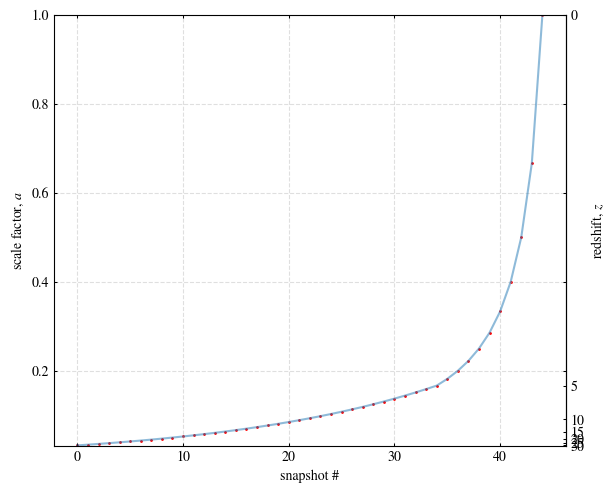

In [24]:
s_list = np.arange(0, 45)
fig, ax = plt.subplots()
ax.plot(s_list, a_list_DMO, alpha=0.5)
ax.scatter(s_list, a_list_DMO, s=1, c="red")

ax_ = ax.secondary_yaxis("right", functions=(z,a))

ax.set_xlabel("snapshot #")
ax.set_ylabel(r"scale factor, $a$")
ax_.set_ylabel(r"redshift, $z$")
ax.grid(alpha=0.4, ls="dashed")

ax.set_ylim(a_list_DMO[0] - 1e-3, a_list_DMO[-1] + 1e-3)

plt.savefig("snap_list_DMO.pdf")